<a href="https://colab.research.google.com/github/dharmasish/Business-case-studies/blob/main/Jambore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement : predict one's chances of admission bassedon on student's data

### Import libraries

In [ ]:
# General Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Scikitlearn modules import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Validation matrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

**Get dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Jamboree_Admission.csv')
df = df.drop('Serial No.', axis=1) #removing serial number from data
df.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65

In [ ]:
len(df.drop_duplicates())


500

* No dupicate row values

# EDA

In [ ]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


* There are no Missing values

In [ ]:
df.describe()

GRE Score  TOEFL Score  University Rating         SOP       LOR   \
count  500.000000   500.000000         500.000000  500.000000  500.00000   
mean   316.472000   107.192000           3.114000    3.374000    3.48400   
std     11.295148     6.081868           1.143512    0.991004    0.92545   
min    290.000000    92.000000           1.000000    1.000000    1.00000   
25%    308.000000   103.000000           2.000000    2.500000    3.00000   
50%    317.000000   107.000000           3.000000    3.500000    3.50000   
75%    325.000000   112.000000           4.000000    4.000000    4.00000   
max    340.000000   120.000000           5.000000    5.000000    5.00000   

             CGPA    Research  Chance of Admit   
count  500.000000  500.000000         500.00000  
mean     8.576440    0.560000           0.72174  
std      0.604813    0.496884           0.14114  
min      6.800000    0.000000           0.34000  
25%      8.127500    0.000000           0.63000  
50%      8.560000    1.000000           0.72000  
75%      9.040000    1.000000           0.82000  
max      9.920000    1.000000           0.97000

* From min -max range value there are no extream outliers in data

In [ ]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

* from unique count values 'University Rating', 'SOP', 'LOR 'and 'Research' are categorical columns

# Univariate Analysis

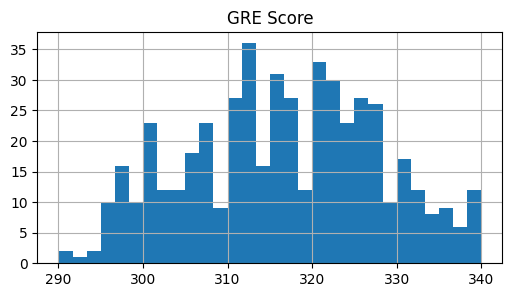

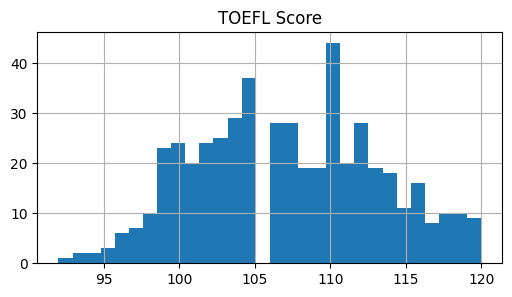

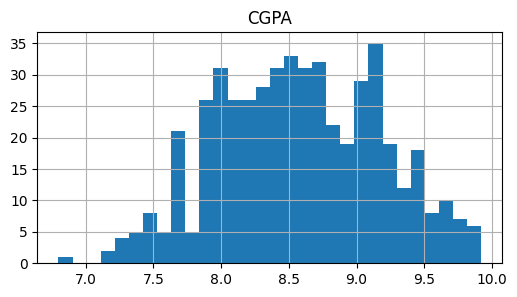

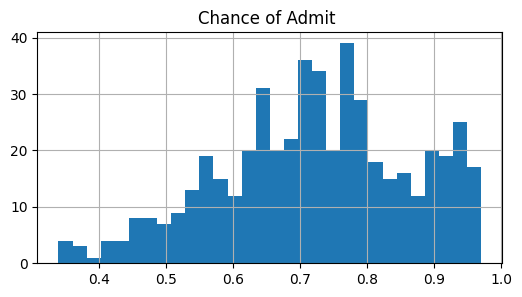

In [ ]:

numerical_col = ['GRE Score', 'TOEFL Score','CGPA' , 'Chance of Admit ']

for col in numerical_col:
  plt.figure(figsize=(6,3))
  df[col].hist(bins = 30)
  plt.title(col)

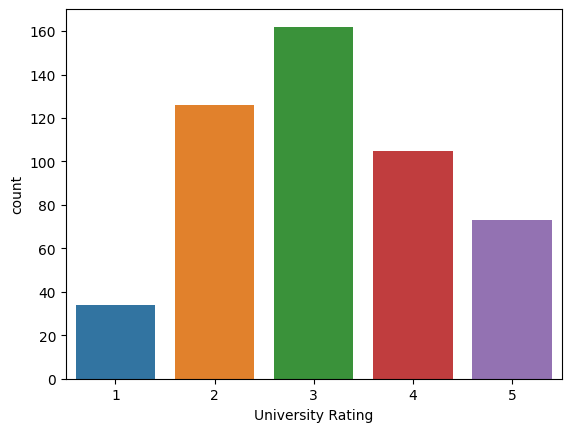

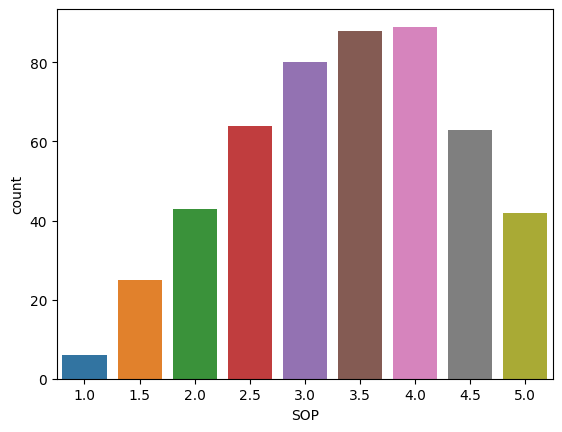

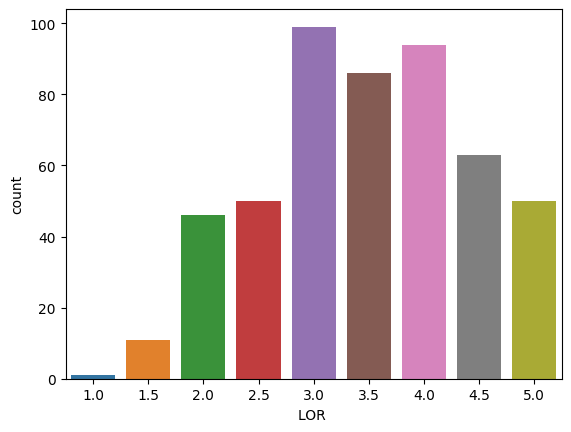

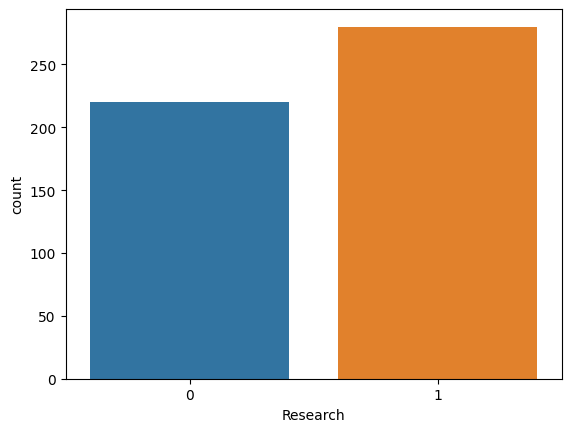

In [ ]:


categorical_col = ['University Rating', 'SOP', 'LOR ','Research']

for col in categorical_col:
  plt.figure()
  sns.countplot(x=col , data=df)

# Bi-variate analysis

### Scatter plot between numerical features and target : Chance of Admit

<Figure size 500x200 with 0 Axes>

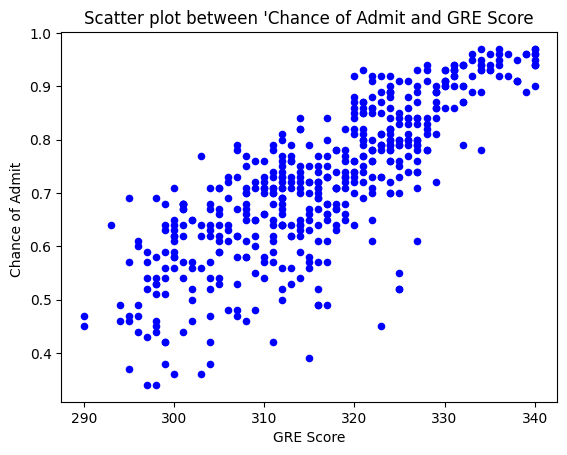

<Figure size 500x200 with 0 Axes>

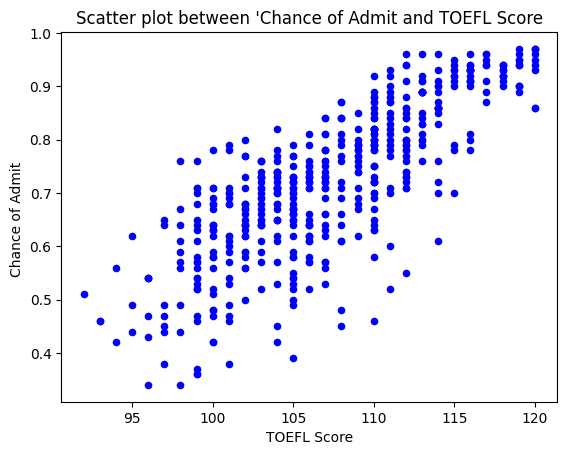

<Figure size 500x200 with 0 Axes>

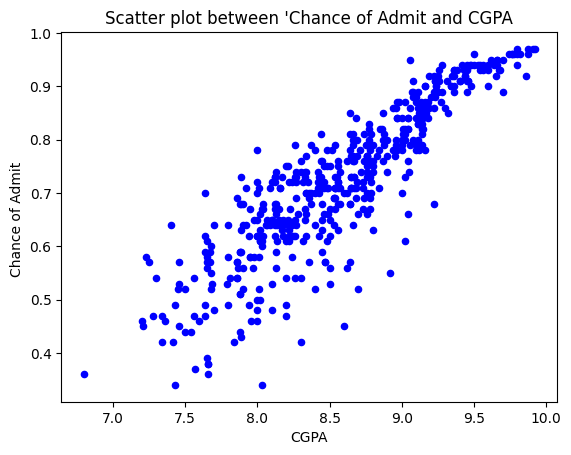

In [ ]:
for col in ['GRE Score', 'TOEFL Score','CGPA' ]:
  plt.figure(figsize=(5,2))
  df.plot.scatter(x= col, y= 'Chance of Admit ', color='blue', marker='o')
  plt.title("Scatter plot between 'Chance of Admit and " + col)

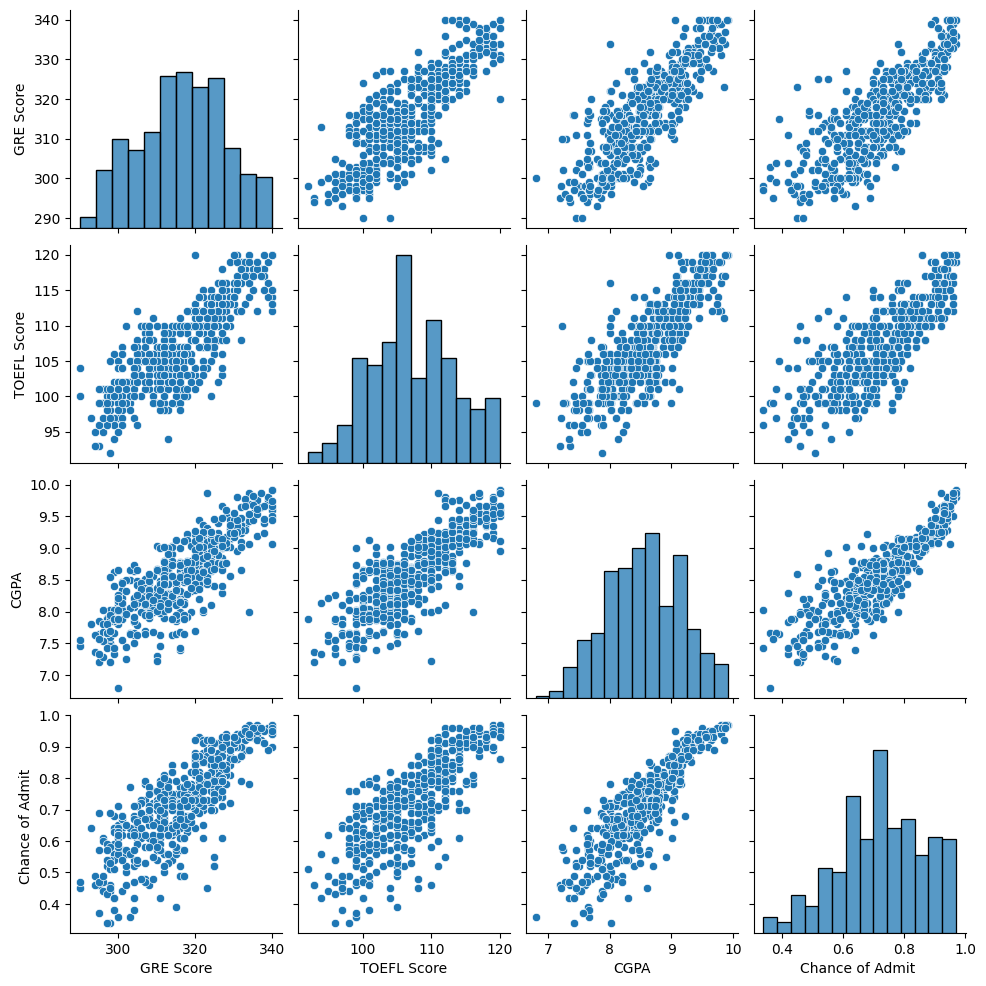

In [ ]:
sns.pairplot(df[['GRE Score', 'TOEFL Score','CGPA' , 'Chance of Admit ']])

### Corelation Matrix

<Axes: >

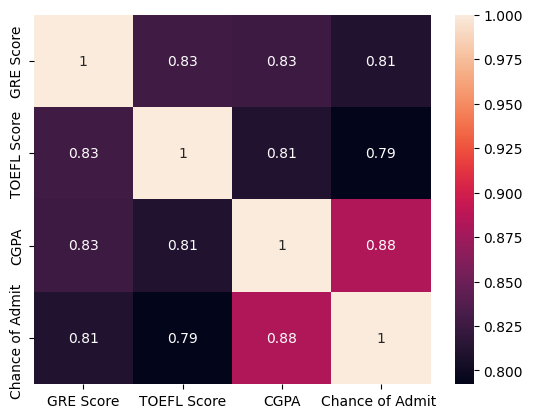

In [ ]:
corr_matrix = df[['GRE Score', 'TOEFL Score','CGPA' , 'Chance of Admit ']].corr()

sns.heatmap(corr_matrix , annot = True)

* strong corelation of features with predictor

<Axes: >

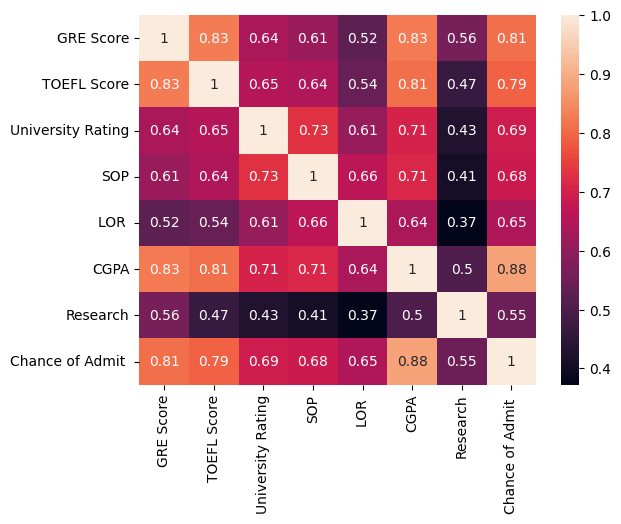

In [ ]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix , annot = True)

### Box plot between Categorical features and target : Chance of Admit

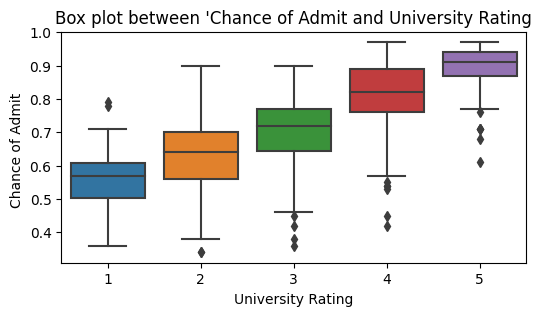

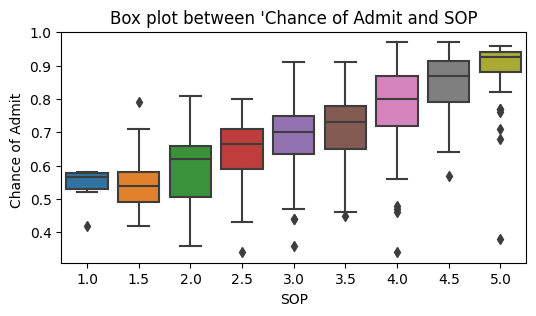

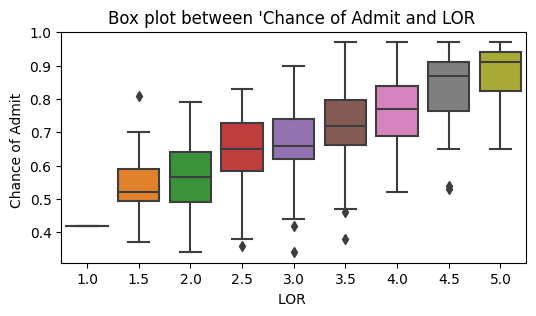

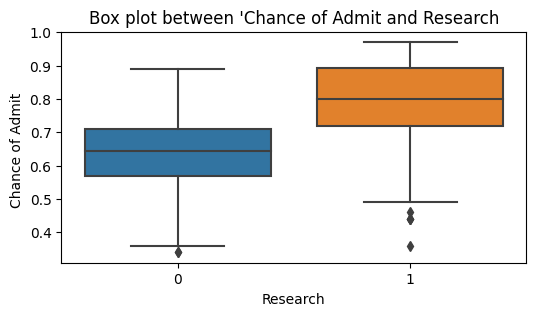

In [ ]:
for col in categorical_col:
  plt.figure(figsize=(6,3))

  sns.boxplot(x = col , y = 'Chance of Admit ',data= df)
  plt.title("Box plot between 'Chance of Admit and " + col)

* From the plots there is distint pattern between most of the categories of categorical features

## Test Multicollinearity check by VIF score

In [ ]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# df = df.drop('Serial No.' , axis = 1)

X = df[df.columns.drop('Chance of Admit ')]
y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

scaler = StandardScaler()
X_tr_scaled = scaler.fit_transform(X_train)

In [ ]:
vif = pd.DataFrame()
X_t = pd.DataFrame(X_tr_scaled, columns=X_train.columns)
vif['Features'] = X_t.columns
vif['VIF'] = [variance_inflation_factor(X_t.values, i) for i in range(X_t.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
5               CGPA  4.77
0          GRE Score  4.24
1        TOEFL Score  4.06
3                SOP  2.71
2  University Rating  2.59
4               LOR   1.98
6           Research  1.47

* As VIF score is < 10 for each we will not remove any column

## Model validation metrics function

In [ ]:
def model_evaluation_metrics(model , x ,y):
  y_pred = model.predict(x)

  mae = mean_absolute_error(y, y_pred)
  mse = mean_squared_error(y, y_pred)
  rmse = np.sqrt(mse)

  # Calculate R^2
  r2 = r2_score(y, y_pred)

  # Calculate adjusted R^2
  n = x.shape[0] # number of observations
  k = x.shape[1] # number of predictors

  adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - k - 1)

  print(f"Mean Absolute Error (MAE): {mae:.2f}")
  print(f"Root Mean Squared Error (MSE): {rmse:.2f}")
  print(f"R^2 Score : {r2:.2f}")
  print(f"adjusted R^2 Score : {adjusted_r2:.2f}")

  return([mae, rmse, r2, adjusted_r2] )

### Baseline model : Simple linear regression with all inputs as predictors without any pre=processing

In [ ]:
target = 'Chance of Admit '
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

baseline_model = LinearRegression()
baseline_model.fit(X_train, y_train)


LinearRegression()

In [ ]:

print('test metrics: \n')
model_score_test = model_evaluation_metrics(baseline_model , X_test ,y_test)
print('\n train metrics:\n')
model_score_train = model_evaluation_metrics(baseline_model ,X_train, y_train)



test metrics: 

Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.83
adjusted R^2 Score : 0.82

 train metrics:

Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.82
adjusted R^2 Score : 0.81


In [ ]:
# Get the coefficients
coefficients = baseline_model.coef_

# Pairing feature names with their importance values
feature_importances = pd.Series(coefficients, index=X.columns).sort_values(ascending=False)

print(feature_importances)

CGPA                 0.115783
Research             0.020750
LOR                  0.015220
TOEFL Score          0.003428
University Rating    0.003095
GRE Score            0.002230
SOP                  0.001515
dtype: float64


## Observation

### Baseline model Has similar accuracy metrics for training and testing dataset implying no overfitting

### Top 3 predictors are: CGPA , research experience and Letter of recommendation strength


## Lets try to improve model accuracy furtur by :
1. scaling inputs
2. performing onehot encoding for categorical data
3. trying regularigation : Lasso and Ridge

## Linear regression model with scaling and onehot encoding of categorical features

In [ ]:

# Get dataframe
# df = pd.read_csv('/content/drive/MyDrive/Jamboree_Admission.csv')
# df = df.drop('Serial No.', axis = 1)

# Lists of column types
numerical_col = ['GRE Score', 'TOEFL Score','CGPA']
categorical_col = ['University Rating', 'SOP', 'LOR ','Research']
target = 'Chance of Admit '

# Split into train and test
X = df.drop(target, axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Build transformers for both numerical and categorical columns
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine both transformers into a single preprocessor using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_col),
        ('cat', categorical_transformer, categorical_col)
    ])

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', LinearRegression())
                          ])

# Preprocess the data and train the model
pipeline.fit(X_train, y_train)




Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['GRE Score', 'TOEFL Score',
                                                   'CGPA']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['University Rating', 'SOP',
                                                   'LOR ', 'Research'])])),
                ('model', LinearRegression())])

In [ ]:
print('test metrics: \n')
model_score_test = model_evaluation_metrics(pipeline , X_test ,y_test)
print('\n train metrics:\n')
model_score_train = model_evaluation_metrics(pipeline ,X_train, y_train)

test metrics: 

Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.82
adjusted R^2 Score : 0.81

 train metrics:

Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.82
adjusted R^2 Score : 0.82


### No improvement from baseline model

## Ridge regression

In [ ]:
rate_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
scaler = StandardScaler()
for rate in rate_list:

  # Create and evaluate the pipeline with ridge regression
  pipeline_ridge = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', Ridge(alpha=rate)) ])

  # Preprocess the data and train the model
  pipeline_ridge.fit(X_train, y_train)

  train_score = pipeline_ridge.score(X_train, y_train)
  test_score= pipeline_ridge.score(X_test, y_test)

  print('alpha = ' , rate)
  print('test metrics')
  model_score_test = model_evaluation_metrics(pipeline_ridge , X_test ,y_test)
  print('train metrics')
  model_score_train = model_evaluation_metrics(pipeline_ridge ,X_train, y_train)
  print('------------------------')

alpha =  0.0001
test metrics
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.82
adjusted R^2 Score : 0.81
train metrics
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.82
adjusted R^2 Score : 0.82
------------------------
alpha =  0.001
test metrics
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.82
adjusted R^2 Score : 0.81
train metrics
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.82
adjusted R^2 Score : 0.82
------------------------
alpha =  0.01
test metrics
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.82
adjusted R^2 Score : 0.81
train metrics
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.82
adjusted R^2 Score : 0.82
------------------------
alpha =  0.1
test metrics
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.82
adjusted R^2 Score : 0

### No improvement from baseline model

## Lasso regession

In [ ]:
train_scores = []
test_scores = []
rate_list = [0.0001, 0.001, 0.01, 0.1, 1, 10]
scaler = StandardScaler()
for rate in rate_list:

  # Create and evaluate the pipeline with ridge regression
  pipeline_lasso = Pipeline(steps=[('preprocessor', preprocessor),
                            ('model', Lasso(alpha=rate)) ])

  # Preprocess the data and train the model
  pipeline_lasso.fit(X_train, y_train)

  train_score = pipeline_lasso.score(X_train, y_train)
  test_score= pipeline_lasso.score(X_test, y_test)
  train_scores.append(train_score)
  test_scores.append(test_score)

  print('alpha = ' , rate)
  print('test metrics')
  model_score_test = model_evaluation_metrics(pipeline_lasso , X_test ,y_test)
  print('train metrics')
  model_score_train = model_evaluation_metrics(pipeline_lasso ,X_train, y_train)
  print('------------------------')

alpha =  0.0001
test metrics
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.82
adjusted R^2 Score : 0.81
train metrics
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.82
adjusted R^2 Score : 0.82
------------------------
alpha =  0.001
test metrics
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.81
adjusted R^2 Score : 0.80
train metrics
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.82
adjusted R^2 Score : 0.81
------------------------
alpha =  0.01
test metrics
Mean Absolute Error (MAE): 0.04
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.80
adjusted R^2 Score : 0.79
train metrics
Mean Absolute Error (MAE): 0.05
Root Mean Squared Error (MSE): 0.06
R^2 Score : 0.80
adjusted R^2 Score : 0.80
------------------------
alpha =  0.1
test metrics
Mean Absolute Error (MAE): 0.10
Root Mean Squared Error (MSE): 0.12
R^2 Score : 0.26
adjusted R^2 Score : 0

### No improvement from baseline model. Model performance decreases as regularization alpha increases

## **Final comment on model selection:** We will proceed with baseline model which is simple linear regression model without any pre-processing as we are not seeing any improvement in performance we shal go with simplest model

## Testing the assumptions of the linear regression model



In [ ]:
baseline_model

### Testing The mean of residuals is nearly zero

In [ ]:
y_pred_test = baseline_model.predict(X_test)
residuals_test = y_test - y_pred_test

y_pred_train = baseline_model.predict(X_train)
residuals_train = y_train - y_pred_train

In [ ]:
print('mean residual for test' , np.mean(residuals_test))

print('mean residual for train' , np.mean(residuals_train))

mean residual for test -0.005876385714746848
mean residual for train 2.5424107263916085e-16


### mean residual close to 0

### Testing Linearity of variables (no pattern in the residual plot)

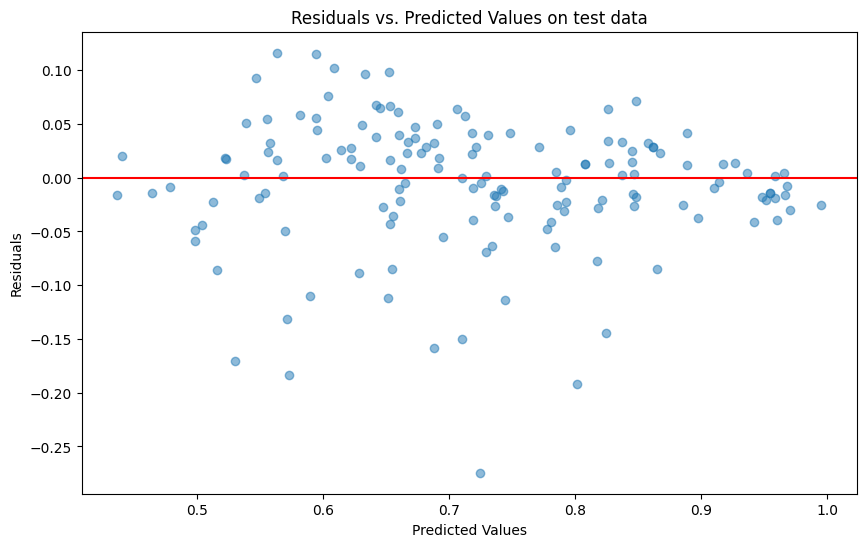

In [ ]:


# Plot residuals for test data


# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals_test, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values on test data')
plt.show()

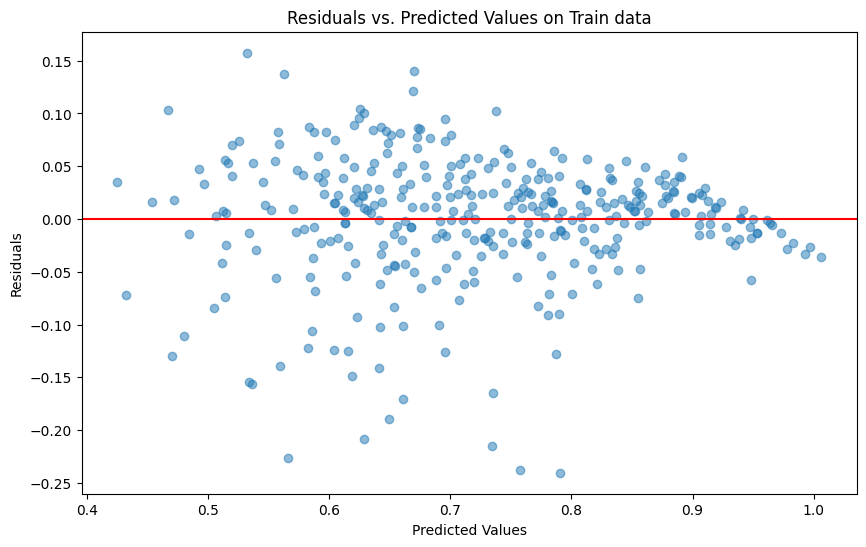

In [ ]:


# Plot residuals for train data


# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_train, residuals_train, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values on Train data')
plt.show()

### No patterns observed in the residuals for the range of predicted values

## Testing Normality of residuals

<Axes: xlabel='Chance of Admit ', ylabel='Count'>

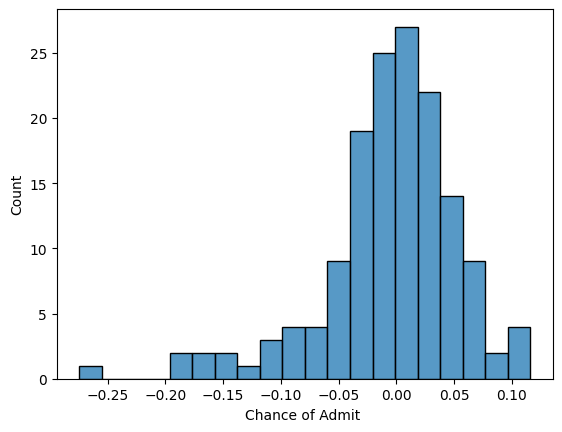

In [ ]:
sns.histplot(residuals_test , bins=20)
plt.title('distribution of residuals on test data')

Text(0.5, 1.0, 'distribution of residuals on train data')

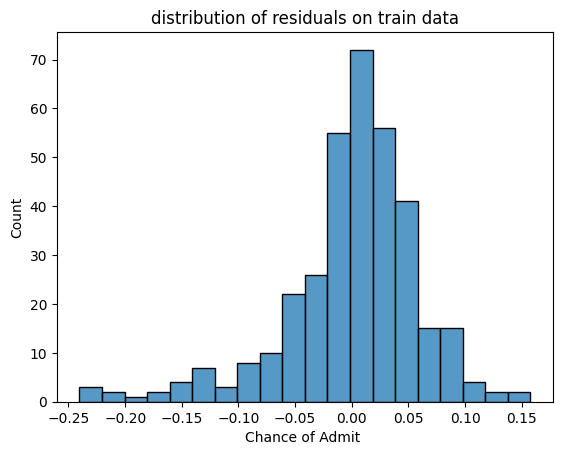

In [ ]:


sns.histplot(residuals_train , bins=20)
plt.title('distribution of residuals on train data')


In [ ]:
from scipy import stats

res_train = stats.shapiro(residuals_train)
print( 'shapiro test statistics on test data' ,res_train.statistic)

res_test = stats.shapiro(residuals_test)
print('shapiro test statistics on train data' ,res_test.statistic)

shapiro test statistics on test data 0.9275473952293396
shapiro test statistics on train data 0.9215348958969116


Closer the value to 1, more is the normality.

In this case, a value of 0.92 denotes a high level of normality for the error distribuiton

Test for Homoscedasticity

In [ ]:
# Performing the Goldfeld-Quandt test to check for Homoscedasticity -
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_test, X_test)
lzip(name, test)

[('F statistic', 0.9028684961900688), ('p-value', 0.6626313652809248)]

In [ ]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, X_train)
lzip(name, test)

[('F statistic', 0.9009353009308497), ('p-value', 0.7501381910763911)]

passed test

#Conclusion: findings are provided through out the notebook

1. Top 3 predictors are: CGPA , research experience and Letter of recommendation strength

2.  additional data that may help model
  
* Gender of applicant
* Nationality of applicant
* Age of applicant
* is foreigner for the applied country  

In [ ]:
import requests
import pandas as pd

class OptionChain():
    def __init__(self, symbol='NIFTY', timeout=5) -> None:
        self.__url = "https://www.nseindia.com/api/option-chain-indices?symbol={}".format(symbol)
        self.__session = requests.sessions.Session()
        self.__session.headers = { "User-Agent": "Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:102.0) Gecko/20100101 Firefox/102.0", "Accept": "*/*", "Accept-Language": "en-US,en;q=0.5" }
        self.__timeout = timeout
        self.__session.get("https://www.nseindia.com/option-chain", timeout=self.__timeout)

    def fetch_data(self, expiry_date=None, starting_strike_price=None, number_of_rows=2):
        try:
            data = self.__session.get(url=self.__url, timeout=self.__timeout)
            data = data.json()
            df = pd.json_normalize(data['records']['data'])

            if expiry_date != None:
                df = df[(df.expiryDate == expiry_date)]

            if starting_strike_price != None:
                df = df[(df.strikePrice >= starting_strike_price)][:number_of_rows]

            return df
        except Exception as ex:
            print('Error: {}'.format(ex))
            self.__session.get("https://www.nseindia.com/option-chain", timeout=self.__timeout)



if __name__ == '__main__':
    oc = OptionChain()
    print(oc.fetch_data(expiry_date='28-Dec-2023', starting_strike_price=19000).iloc[0])

strikePrice                                           19000
expiryDate                                      28-Dec-2023
PE.strikePrice                                      19000.0
PE.expiryDate                                   28-Dec-2023
PE.underlying                                         NIFTY
PE.identifier               OPTIDXNIFTY28-12-2023PE19000.00
PE.openInterest                                     55502.0
PE.changeinOpenInterest                              2358.0
PE.pchangeinOpenInterest                           4.437001
PE.totalTradedVolume                                 8869.0
PE.impliedVolatility                                  14.07
PE.lastPrice                                         165.45
PE.change                                             -34.0
PE.pChange                                       -17.046879
PE.totalBuyQuantity                                 41200.0
PE.totalSellQuantity                                23950.0
PE.bidQty                               

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df = oc.fetch_data()

In [ ]:
df.dropna().reset_index()

index  strikePrice   expiryDate  PE.strikePrice PE.expiryDate  \
0        6        13000  28-Dec-2023         13000.0   28-Dec-2023   
1       11        14000  28-Dec-2023         14000.0   28-Dec-2023   
2       24        15000  28-Dec-2023         15000.0   28-Dec-2023   
3       36        16000  28-Dec-2023         16000.0   28-Dec-2023   
4       40        16000  26-Dec-2024         16000.0   26-Dec-2024   
5       49        17000  28-Dec-2023         17000.0   28-Dec-2023   
6       50        17000  28-Mar-2024         17000.0   28-Mar-2024   
7       53        17000  26-Dec-2024         17000.0   26-Dec-2024   
8       61        17500  28-Dec-2023         17500.0   28-Dec-2023   
9       62        17750  05-Oct-2023         17750.0   05-Oct-2023   
10      63        17750  26-Oct-2023         17750.0   26-Oct-2023   
11      64        17750  30-Nov-2023         17750.0   30-Nov-2023   
12      65        17800  05-Oct-2023         17800.0   05-Oct-2023   
13      66        17800  26-Oct-2023         17800.0   26-Oct-2023   
14      67        17800  30-Nov-2023         17800.0   30-Nov-2023   
15      68        17850  05-Oct-2023         17850.0   05-Oct-2023   
16      69        17850  26-Oct-2023         17850.0   26-Oct-2023   
17      70        17850  30-Nov-2023         17850.0   30-Nov-2023   
18      71        17900  05-Oct-2023         17900.0   05-Oct-2023   
19      72        17900  26-Oct-2023         17900.0   26-Oct-2023   
20      73        17900  30-Nov-2023         17900.0   30-Nov-2023   
21      74        17950  05-Oct-2023         17950.0   05-Oct-2023   
22      75        17950  12-Oct-2023         17950.0   12-Oct-2023   
23      76        17950  19-Oct-2023         17950.0   19-Oct-2023   
24      77        17950  26-Oct-2023         17950.0   26-Oct-2023   
25      79        17950  30-Nov-2023         17950.0   30-Nov-2023   
26      80        18000  05-Oct-2023         18000.0   05-Oct-2023   
27      81        18000  12-Oct-2023         18000.0   12-Oct-2023   
28      82        18000  19-Oct-2023         18000.0   19-Oct-2023   
29      83        18000  26-Oct-2023         18000.0   26-Oct-2023   
30      85        18000  30-Nov-2023         18000.0   30-Nov-2023   
31      86        18000  28-Dec-2023         18000.0   28-Dec-2023   
32      87        18000  28-Mar-2024         18000.0   28-Mar-2024   
33      88        18000  27-Jun-2024         18000.0   27-Jun-2024   
34      89        18000  26-Sep-2024         18000.0   26-Sep-2024   
35      90        18000  26-Dec-2024         18000.0   26-Dec-2024   
36      92        18000  24-Dec-2025         18000.0   24-Dec-2025   
37      93        18000  25-Jun-2026         18000.0   25-Jun-2026   
38      98        18050  05-Oct-2023         18050.0   05-Oct-2023   
39      99        18050  12-Oct-2023         18050.0   12-Oct-2023   
40     100        18050  19-Oct-2023         18050.0   19-Oct-2023   
41     101        18050  26-Oct-2023         18050.0   26-Oct-2023   
42     103        18050  30-Nov-2023         18050.0   30-Nov-2023   
43     104        18050  28-Dec-2023         18050.0   28-Dec-2023   
44     105        18100  05-Oct-2023         18100.0   05-Oct-2023   
45     106        18100  12-Oct-2023         18100.0   12-Oct-2023   
46     107        18100  19-Oct-2023         18100.0   19-Oct-2023   
47     108        18100  26-Oct-2023         18100.0   26-Oct-2023   
48     110        18100  30-Nov-2023         18100.0   30-Nov-2023   
49     111        18100  28-Dec-2023         18100.0   28-Dec-2023   
50     112        18150  05-Oct-2023         18150.0   05-Oct-2023   
51     113        18150  12-Oct-2023         18150.0   12-Oct-2023   
52     114        18150  19-Oct-2023         18150.0   19-Oct-2023   
53     115        18150  26-Oct-2023         18150.0   26-Oct-2023   
54     116        18150  02-Nov-2023         18150.0   02-Nov-2023   
55     117        18150  30-Nov-2023         18150.0   30-Nov-2023   
56     118     

In [ ]:
df.dropna().reset_index().to_csv('5th_oct.csv')

In [ ]:
df.dropna().reset_index()

index  strikePrice   expiryDate  PE.strikePrice PE.expiryDate  \
0        0        11000  28-Dec-2023         11000.0   28-Dec-2023   
1        2        12000  28-Sep-2023         12000.0   28-Sep-2023   
2        7        13000  28-Sep-2023         13000.0   28-Sep-2023   
3        8        13000  28-Dec-2023         13000.0   28-Dec-2023   
4       13        14000  28-Sep-2023         14000.0   28-Sep-2023   
5       14        14000  28-Dec-2023         14000.0   28-Dec-2023   
6       26        15000  28-Sep-2023         15000.0   28-Sep-2023   
7       27        15000  28-Dec-2023         15000.0   28-Dec-2023   
8       30        15000  26-Dec-2024         15000.0   26-Dec-2024   
9       38        16000  28-Sep-2023         16000.0   28-Sep-2023   
10      39        16000  28-Dec-2023         16000.0   28-Dec-2023   
11      40        16000  28-Mar-2024         16000.0   28-Mar-2024   
12      42        16000  26-Dec-2024         16000.0   26-Dec-2024   
13      51        17000  28-Sep-2023         17000.0   28-Sep-2023   
14      52        17000  28-Dec-2023         17000.0   28-Dec-2023   
15      53        17000  28-Mar-2024         17000.0   28-Mar-2024   
16      55        17000  26-Dec-2024         17000.0   26-Dec-2024   
17      56        17000  26-Jun-2025         17000.0   26-Jun-2025   
18      57        17000  24-Dec-2025         17000.0   24-Dec-2025   
19      62        17450  28-Sep-2023         17450.0   28-Sep-2023   
20      63        17500  28-Sep-2023         17500.0   28-Sep-2023   
21      64        17500  28-Dec-2023         17500.0   28-Dec-2023   
22      65        17550  28-Sep-2023         17550.0   28-Sep-2023   
23      66        17600  28-Sep-2023         17600.0   28-Sep-2023   
24      67        17650  28-Sep-2023         17650.0   28-Sep-2023   
25      68        17700  28-Sep-2023         17700.0   28-Sep-2023   
26      69        17750  28-Sep-2023         17750.0   28-Sep-2023   
27      70        17750  05-Oct-2023         17750.0   05-Oct-2023   
28      71        17750  26-Oct-2023         17750.0   26-Oct-2023   
29      72        17750  30-Nov-2023         17750.0   30-Nov-2023   
30      73        17800  28-Sep-2023         17800.0   28-Sep-2023   
31      74        17800  05-Oct-2023         17800.0   05-Oct-2023   
32      75        17800  26-Oct-2023         17800.0   26-Oct-2023   
33      76        17800  30-Nov-2023         17800.0   30-Nov-2023   
34      77        17850  28-Sep-2023         17850.0   28-Sep-2023   
35      78        17850  05-Oct-2023         17850.0   05-Oct-2023   
36      79        17850  26-Oct-2023         17850.0   26-Oct-2023   
37      80        17850  30-Nov-2023         17850.0   30-Nov-2023   
38      81        17900  28-Sep-2023         17900.0   28-Sep-2023   
39      82        17900  05-Oct-2023         17900.0   05-Oct-2023   
40      83        17900  26-Oct-2023         17900.0   26-Oct-2023   
41      84        17900  30-Nov-2023         17900.0   30-Nov-2023   
42      85        17950  28-Sep-2023         17950.0   28-Sep-2023   
43      86        17950  05-Oct-2023         17950.0   05-Oct-2023   
44      87        17950  26-Oct-2023         17950.0   26-Oct-2023   
45      88        17950  30-Nov-2023         17950.0   30-Nov-2023   
46      89        18000  28-Sep-2023         18000.0   28-Sep-2023   
47      90        18000  05-Oct-2023         18000.0   05-Oct-2023   
48      91        18000  26-Oct-2023         18000.0   26-Oct-2023   
49      92        18000  30-Nov-2023         18000.0   30-Nov-2023   
50      93        18000  28-Dec-2023         18000.0   28-Dec-2023   
51      94        18000  28-Mar-2024         18000.0   28-Mar-2024   
52      95        18000  27-Jun-2024         18000.0   27-Jun-2024   
53      96        18000  26-Dec-2024         18000.0   26-Dec-2024   
54      98        18000  24-Dec-2025         18000.0   24-Dec-2025   
55     103        18050  28-Sep-2023         18050.0   28-Sep-2023   
56     104     

In [ ]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/018/746/original/loan.csv?1666170299')

data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [ ]:
data['NewFeature'] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"])

In [ ]:
mean_feature = data['NewFeature'].mean()



In [ ]:
 data['separetor'] = data['NewFeature'].apply(lambda x: 1 if x> 0.25* mean_feature else 0)



In [ ]:

ct = pd.crosstab(data['separetor'], data['Loan_Status'])

ct

Loan_Status    N    Y
separetor            
0             12    2
1            136  330

In [ ]:
from scipy.stats import chi2_contingency

chi2_contingency(ct)

Chi2ContingencyResult(statistic=17.801721409974167, pvalue=2.4516133902913108e-05, dof=1, expected_freq=array([[  4.31666667,   9.68333333],
       [143.68333333, 322.31666667]]))

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Read data
# data = pd.read_csv('loan.csv')

# Add a column indicating that the entry contains graduate and married men
data.dropna(inplace=True)
data['NewFeature'] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"])
data['Separator'] = data['NewFeature'] > (data['NewFeature'].mean()*0.25)

# Perform a chi-square test since the incomes are a continuous variable.
contingency = pd.crosstab(data['Separator'], data['Loan_Status'])
print(contingency)

# p-value calculation
p_value = chi2_contingency(contingency)[1]
print('p-value:',round(p_value,4))

if(p_value < 0.05):
  print("Since p-value < 0.05, the two features 'Separator' and 'Loan_Status' are dependent.")
else:
  print("Since p-value > 0.05, the two features 'Separator' and 'Loan_Status' are independent.")

Loan_Status    N    Y
Separator            
False         11    2
True         137  330
p-value: 0.0001
Since p-value < 0.05, the two features 'Separator' and 'Loan_Status' are dependent.


In [ ]:
contingency

Loan_Status    N    Y
Separator            
False         11    2
True         137  330

In [ ]:
data = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/018/746/original/loan.csv?1666170299')

data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [ ]:
data['Loan_Amount_per_year'] = data['LoanAmount']  / data['Loan_Amount_Term']
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  Loan_Amount_per_year  
0             1.0         Urban           Y                   NaN  
1             1.0         Rural           N              0.355556  
2             1.0         Urban           Y              0.183333  
3             1.0         Urban           Y              0.333333  
4             1.0         Urban           Y              0.391667

In [ ]:
group1 = data[data.Gender == 'Female']

group2 = data[(data.Gender == 'Male') & (data.Married == 'No')]


In [ ]:
print(group1['Loan_Amount_per_year'].var())

print(group2['Loan_Amount_per_year'].var())

0.22548316632557983
0.11362377496532253


In [ ]:
from scipy.stats import levene, ttest_ind

# 4. Perform the Levene test.
stat, p = levene(group1['Loan_Amount_per_year'].dropna(), group2['Loan_Amount_per_year'].dropna(), center='median')
print("\nLevene Test:")
print("Statistic:", stat)
print("P-value:", p)


Levene Test:
Statistic: 0.02791644898384745
P-value: 0.8674541435146872


In [ ]:
# 5. Apply the t-test.
t_stat, t_p = ttest_ind(group1['Loan_Amount_per_year'].dropna(), group2['Loan_Amount_per_year'].dropna(), equal_var=(p > 0.05))
print("\nT-test:")
print("Statistic:", t_stat)
print("P-value:", t_p)


T-test:
Statistic: -0.21974350394440115
P-value: 0.8263121112719289


Number of group1 datapoints 108
Variance of group1: 0.11
Number of group2 datapoints 86
Variance of group2: 0.24
levene test p-value 0.65
t-test p-value: 0.95


In [ ]:
df_reject = data[data.Loan_Status == 'N'].dropna()

In [ ]:
ct = pd.crosstab(data['Gender'], data['Credit_History'])

ct

Credit_History  0.0  1.0
Gender                  
Female           17   84
Male             69  382

In [ ]:
chi2_contingency(ct)

Chi2ContingencyResult(statistic=0.05384950259015772, pvalue=0.8164953298683041, dof=1, expected_freq=array([[ 15.73550725,  85.26449275],
       [ 70.26449275, 380.73550725]]))